# Project Week 2: Classification with the Titanic Database

#### Importing libraries

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score 


### Step 1: Getting data

In [77]:
df = pd.read_csv('Data/train.csv',sep =",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Performing EDA

In [78]:
df.shape

(891, 12)

Text(0, 0.5, 'Count')

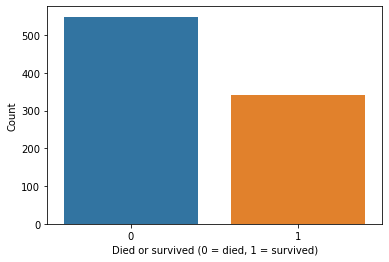

In [79]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.
sns.countplot(data = df, x = "Survived")
plt.xlabel("Died or survived (0 = died, 1 = survived)")
plt.ylabel("Count")

Text(0, 0.5, 'Survived or not')

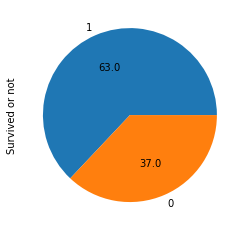

In [80]:
# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
df_1st = df.loc[df['Pclass']== 1 ]
df_1st['Survived'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f")
plt.ylabel("Survived or not")

<AxesSubplot:xlabel='Age', ylabel='Count'>

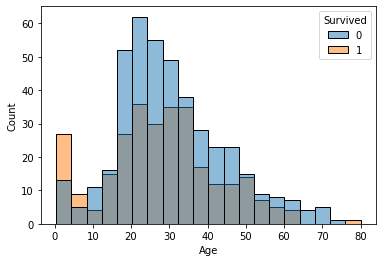

In [81]:
# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
sns.histplot(data=df, x="Age", hue="Survived")

In [82]:
# Calculate the average age for survived and drowned passengers separately.
df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [83]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
df.groupby(['Survived','Sex','Pclass'])['Pclass'].count().to_frame().rename(columns = {'Pclass': 'People Count'}) 

People Count
Survived Sex    Pclass              
0        female 1                  3
                2                  6
                3                 72
         male   1                 77
                2                 91
                3                300
1        female 1                 91
                2                 70
                3                 72
         male   1                 45
                2                 17
                3                 47

### Step 3: Model definition and train test split
We split the data into train and test datasets. The model  should not see the test data until the ened when we use it to evaluate the performance of the model.

In [84]:
df2 = df.loc[df['Sex']=="male"]
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
y = df2['Survived']
y.shape

(577,)

In [86]:
X = df2[['Pclass', 'Age', 'Name','SibSp', 'Fare', 'Parch', 'Embarked']] #approach, you know which features you want to take
X

,Pclass,Age,Name,SibSp,Fare,Parch,Embarked
0,3,22.0,"Braund, Mr. Owen Harris",1,7.2500,0,S
4,3,35.0,"Allen, Mr. William Henry",0,8.0500,0,S
5,3,NaN,"Moran, Mr. James",0,8.4583,0,Q
6,1,54.0,"McCarthy, Mr. Timothy J",0,51.8625,0,S
7,3,2.0,"Palsson, Master. Gosta Leonard",3,21.0750,1,S
...,...,...,...,...,...,...,...
883,2,28.0,"Banfield, Mr. Frederick James",0,10.5000,0,S
884,3,25.0,"Sutehall, Mr. Henry Jr",0,7.0500,0,S
886,2,27.0,"Montvila, Rev. Juozas",0,13.0000,0,S
889,1,26.0,"Behr, Mr. Karl Howell",0,30.0000,0,C


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [88]:
X_train.head()

,Pclass,Age,Name,SibSp,Fare,Parch,Embarked
110,1,47.0,"Porter, Mr. Walter Chamberlain",0,52.0000,0,S
802,1,11.0,"Carter, Master. William Thornton II",1,120.0000,2,S
103,3,33.0,"Johansson, Mr. Gustaf Joel",0,8.6542,0,S
800,2,34.0,"Ponesell, Mr. Martin",0,13.0000,0,S
99,2,34.0,"Kantor, Mr. Sinai",1,26.0000,0,S


In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((461, 7), (116, 7), (461,), (116,))

### Step 4: Feature engineering

#### Custom transformation

In [90]:
def name_length(df2):
    length = df2[df2.columns[0]].str.len()
    return length.values.reshape(-1, 1)

In [91]:
name_transformer = FunctionTransformer(name_length)
name_transformer.fit(X[['Name']])
name_transformer.transform(X[['Name']])

array([[23],
       [24],
       [16],
       [23],
       [30],
       [30],
       [27],
       [20],
       [28],
       [20],
       [21],
       [28],
       [23],
       [30],
       [19],
       [24],
       [21],
       [23],
       [30],
       [16],
       [24],
       [19],
       [24],
       [17],
       [19],
       [26],
       [28],
       [30],
       [17],
       [19],
       [34],
       [21],
       [27],
       [21],
       [21],
       [24],
       [24],
       [17],
       [26],
       [20],
       [27],
       [13],
       [23],
       [17],
       [24],
       [29],
       [20],
       [27],
       [23],
       [22],
       [29],
       [22],
       [20],
       [26],
       [27],
       [23],
       [17],
       [27],
       [25],
       [31],
       [17],
       [32],
       [25],
       [26],
       [30],
       [21],
       [22],
       [15],
       [30],
       [22],
       [21],
       [20],
       [31],
       [24],
       [27],
       [26],
       [20],

#### Definition of pipelines

In [92]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [93]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)

In [94]:
name_pipe = make_pipeline(
    FunctionTransformer(name_length),
    MinMaxScaler()
)

#### Column transformer

In [95]:
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['Pclass']),
    ('cat_preprocessing', cat_pipe, ['Embarked']),
    ('num_preprocessing', num_pipe, ['Age', 'Fare', 'SibSp', 'Parch']),
    ('name_preprocessing', name_pipe, ['Name'])
    ])

In [96]:
X_train_trans = feature_transform.fit_transform(X_train)

In [97]:
X_train_trans

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48648649],
       [1.        , 0.        , 0.        , ..., 0.125     , 0.5       ,
        0.62162162],
       [3.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.37837838],
       ...,
       [2.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.7027027 ],
       [3.        , 0.        , 0.        , ..., 0.625     , 0.5       ,
        0.40540541],
       [3.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.37837838]])

### Step 5: Train model and make initial predictions

#### 5.1 Train a baseline model

In [98]:
### Initiate the model
dummy_model = DummyClassifier(strategy= 'most_frequent')

In [99]:
### Fit the model
dummy_model.fit(X_train_trans,y_train)

DummyClassifier(strategy='most_frequent')

In [100]:
y_pred_dummy = dummy_model.predict(X_test)
y_pred_dummy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

#### 5.2 Train logistic regression model

In [101]:
m = LogisticRegression()

In [102]:
m.fit(X_train_trans, y_train)

LogisticRegression()

Take a look at the coefficients

In [103]:
m.coef_

array([[-0.63603556,  0.45232319, -0.37113992, -0.08105632, -1.91269728,
         0.08682819, -0.75880881,  0.87131752,  1.47794606]])

In [104]:
m.intercept_,2

(array([0.23654561]), 2)

In [105]:
f' w1: {m.coef_} and b: {m.intercept_}'

' w1: [[-0.63603556  0.45232319 -0.37113992 -0.08105632 -1.91269728  0.08682819\n  -0.75880881  0.87131752  1.47794606]] and b: [0.23654561]'

In [106]:
X_test.head()

,Pclass,Age,Name,SibSp,Fare,Parch,Embarked
181,2,NaN,"Pernot, Mr. Rene",0,15.0500,0,C
624,3,21.0,"Bowen, Mr. David John ""Dai""",0,16.1000,0,S
794,3,25.0,"Dantcheff, Mr. Ristiu",0,7.8958,0,S
158,3,NaN,"Smiljanic, Mr. Mile",0,8.6625,0,S
685,2,25.0,"Laroche, Mr. Joseph Philippe Lemercier",1,41.5792,2,C


#### 5.3 Preliminary Model evaluation (Version 2)

In [107]:
m.score(X_train_trans, y_train)

0.8156182212581344

In [108]:
# calculate the accuracy
round(dummy_model.score(X_test, y_test),2)

0.83

In [109]:
X_test_trans = feature_transform.transform(X_test) 

In [110]:
# calculate the accuracy
m.score(X_test_trans, y_test)

0.8189655172413793

In [111]:
y_pred = m.predict(X_test_trans)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

#### 5.4 Trying the Decision Tree

In [112]:
decision = DecisionTreeClassifier(max_depth=None)

In [113]:
decision.fit(X_train_trans, y_train)

DecisionTreeClassifier()

In [114]:
decision.score(X_train_trans,y_train)

0.9978308026030369

It is heavily overfitted!

In [115]:
decision2 = DecisionTreeClassifier(max_depth= 2)
decision2.fit(X_train_trans, y_train)

DecisionTreeClassifier(max_depth=2)

In [116]:
round(decision2.score(X_train_trans, y_train),2)

0.84

##### Evaluate decision tree

In [117]:
round(decision.score(X_test_trans,y_test),2)

0.81

In [118]:
round(decision2.score(X_test_trans,y_test),2)

0.84

When the problem of overfitting is ameliorated, the accuracy of the model goes a little up. In this sense, tuning the parameters from the model is the strategy to improve the accuracy.

#### 5.4 Trying the Random Forest

In [119]:
forestdecision = RandomForestClassifier(max_depth=10, n_estimators = 100, random_state = 42)
forestdecision.fit(X_train_trans, y_train)
forestdecision.score(X_train_trans,y_train)

0.9457700650759219

With a large number for the "max_depth" there is huge overfitting of the training set!

In [120]:
forestdecision2 = RandomForestClassifier(max_depth=3, n_estimators = 100, random_state = 42)
forestdecision2.fit(X_train_trans, y_train)
forestdecision2.score(X_train_trans,y_train)

0.8438177874186551

This looks better!

In [121]:
forestdecision3 = RandomForestClassifier(max_depth=3, n_estimators = 100, class_weight='balanced', random_state = 42)
forestdecision3.fit(X_train_trans, y_train)
forestdecision3.score(X_train_trans,y_train)

0.8177874186550976

##### Evaluate Random forest models

In [122]:
round(forestdecision.score(X_test_trans,y_test),2)

0.82

In [123]:
round(forestdecision2.score(X_test_trans,y_test),2)

0.84

In [124]:
round(forestdecision3.score(X_test_trans,y_test),2)

0.76

With the inclusion of the "class_weight='balanced', which is recommendable when the classes are unbalanced, the accuracy is reduced. Regarding the robustness/model quality tradeoff we discussed before, the impact is actually negative.

The models' predictive performance is not that high because the feature "sex", which is very important, has been removed! As can be seen in the heatmap above, there is not much strong correlation between the other data, so we lose one of the most important predictors of the dependent variables. 

`"class_weight='balanced': uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data"`

https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7


### Step 6: Cross-validation
We use cross-validation to evaluate both how good our model is, but also how robust it is.

In [125]:
#For the logistic regression model
cross_val_score(m, X_train_trans, y_train, cv = 5)

array([0.82795699, 0.82608696, 0.79347826, 0.80434783, 0.79347826])

In [126]:
# For the tree
cross_val_score(decision, X_train_trans, y_train, cv = 5)

array([0.68817204, 0.72826087, 0.77173913, 0.80434783, 0.70652174])

In [127]:
# For the forest 1
cross_val_score(forestdecision, X_train_trans, y_train, cv = 5)

array([0.80645161, 0.82608696, 0.84782609, 0.84782609, 0.83695652])

In [128]:
# For the forest 2
cross_val_score(forestdecision2, X_train_trans, y_train, cv = 5)

array([0.82795699, 0.82608696, 0.83695652, 0.82608696, 0.84782609])

In [129]:
# For the forest 3
cross_val_score(forestdecision3, X_train_trans, y_train, cv = 5)

array([0.70967742, 0.81521739, 0.75      , 0.80434783, 0.7826087 ])

We can evaluate how robust is our model - in depending on sample bias ==> it tells us how good it is at generalizing
A model is robust when we get similar scores for different folds ==> let's compare the similarity of the scores

In [130]:
# Logistic regression
round(np.mean(cross_val_score(m, X_train_trans, y_train, cv = 5)),5), round(np.std(cross_val_score(m, X_train_trans, y_train, cv = 5)),3)

(0.80907, 0.015)

In [131]:
# Tree
round(np.mean(cross_val_score(decision, X_train_trans, y_train, cv = 5)),5), round(np.std(cross_val_score(decision, X_train_trans, y_train, cv = 5)),3)

(0.75283, 0.053)

In [132]:
# Forest
round(np.mean(cross_val_score(forestdecision3, X_train_trans, y_train, cv = 5)),5), round(np.std(cross_val_score(forestdecision3, X_train_trans, y_train, cv = 5)),3)

(0.77237, 0.038)

### Step 7: Model evaluation (complete version)

C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


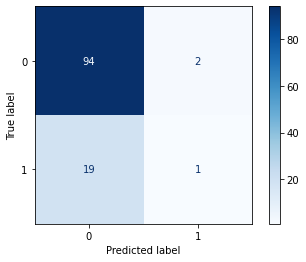

In [133]:
#percentages 
conf = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(estimator=m,
                     X=X_test_trans,
                     y_true=y_test,
                     #normalize='all',
                     cmap='Blues')

#### 7.1 Accuracy

In [134]:
round(accuracy_score(y_test,y_pred),2)

0.82

In [135]:
round(m.score(X_test_trans,y_test),2)

0.82

In [136]:
round(m.score(X_train_trans,y_train),2)

0.82

#### 7.2 Recall 

In [137]:
round(recall_score(y_test,y_pred),2)

0.05

#### 7.3 Precision

In [138]:
round(precision_score(y_test, y_pred),2)

0.33

#### 7.4 F1 score

In [139]:
round(f1_score(y_test,y_pred),2)

0.09

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        96
           1       0.33      0.05      0.09        20

    accuracy                           0.82       116
   macro avg       0.58      0.51      0.49       116
weighted avg       0.75      0.82      0.76       116



#### 7.5 ROC AUC Curve

C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


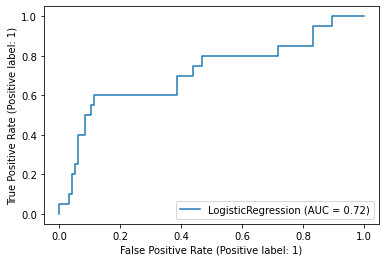

In [141]:
plot_roc_curve(m, X_test_trans, y_test)   

In [142]:
conf_dummy = confusion_matrix(y_test,y_pred_dummy)
conf_dummy

array([[96,  0],
       [20,  0]], dtype=int64)

C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


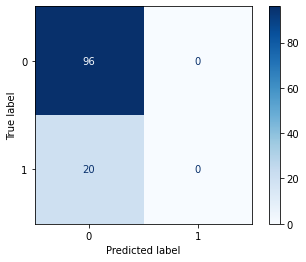

In [143]:
plot_confusion_matrix(estimator=dummy_model,
                     X=X_test,
                     y_true=y_test,
                     #normalize='all',
                     cmap='Blues')

In [144]:
## Accuracy
round(accuracy_score(y_test,y_pred_dummy),2)

0.83

In [145]:
## Recall
round(recall_score(y_test,y_pred_dummy),2)

0.0

In [146]:
## Precision
round(precision_score(y_test, y_pred_dummy),2)

C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [147]:
## F1 Score
round(recall_score(y_test,y_pred_dummy),2)

0.0

In [148]:
## Classification report
print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        96
           1       0.00      0.00      0.00        20

    accuracy                           0.83       116
   macro avg       0.41      0.50      0.45       116
weighted avg       0.68      0.83      0.75       116



C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Step 8: Making some predictions

In [149]:
prob = m.predict_proba(X_test_trans)
[e[0] for e in prob]
X_test['prediction'] = y_pred
X_test.head()

,Pclass,Age,Name,SibSp,Fare,Parch,Embarked,prediction
181,2,NaN,"Pernot, Mr. Rene",0,15.0500,0,C,0
624,3,21.0,"Bowen, Mr. David John ""Dai""",0,16.1000,0,S,0
794,3,25.0,"Dantcheff, Mr. Ristiu",0,7.8958,0,S,0
158,3,NaN,"Smiljanic, Mr. Mile",0,8.6625,0,S,0
685,2,25.0,"Laroche, Mr. Joseph Philippe Lemercier",1,41.5792,2,C,1


In [150]:
X_test['prob of dying'] = [e[0] for e in prob]
X_test['prob of surviving'] = [e[1] for e in prob]
X_test

,Pclass,Age,Name,SibSp,Fare,Parch,Embarked,prediction,prob of dying,prob of surviving
181,2,NaN,"Pernot, Mr. Rene",0,15.0500,0,C,0,0.757277,0.242723
624,3,21.0,"Bowen, Mr. David John ""Dai""",0,16.1000,0,S,0,0.843657,0.156343
794,3,25.0,"Dantcheff, Mr. Ristiu",0,7.8958,0,S,0,0.883986,0.116014
158,3,NaN,"Smiljanic, Mr. Mile",0,8.6625,0,S,0,0.899210,0.100790
685,2,25.0,"Laroche, Mr. Joseph Philippe Lemercier",1,41.5792,2,C,1,0.459028,0.540972
...,...,...,...,...,...,...,...,...,...,...
324,3,NaN,"Sage, Mr. George John Jr",8,69.5500,2,S,0,0.909008,0.090992
121,3,NaN,"Moore, Mr. Leonard Charles",0,8.0500,0,S,0,0.870903,0.129097
385,2,18.0,"Davies, Mr. Charles Henry",0,73.5000,0,S,0,0.739204,0.260796
397,2,46.0,"McKane, Mr. Peter David",0,26.0000,0,S,0,0.865020,0.134980
